In [1]:
# /usr/bin/env python3
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
df_train = pd.read_csv('./data/train.csv')

In [3]:
df_train.head()

,id,flag,title,content
0,3701be69fdea4881874d073b8cc3bfdb,1,办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没...,办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没...
1,967b683e4742489fb4738eb7d5f0ae4e,0,秋介绍~,秋介绍~
2,f98f7ea52a9b460dbc7d32b4114b925b,1,"""精""改埃尔法提车记！",因为手上的两地牌关系，一直都喜欢买跑车开，觉得用了两地牌在国内开，而且完善的赛道设施，...
3,8cce3056ad9b453996f22508cf5e1d28,0,?里有卖？怎么联系？,?里有卖？怎么联系？
4,0835ce6f7fcb4c7b96490b65f66a65f9,1,“宜”与“亦”之间的区别？这辆车可以回答,灵山清净，拈花一笑。没想到这次的试驾地竟是如此禅意：太湖...


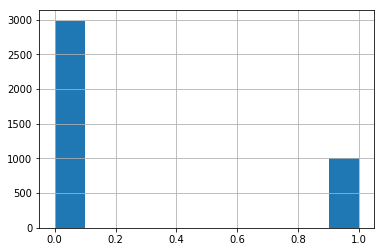

In [4]:
# 标签比例
df_train['flag'].hist()

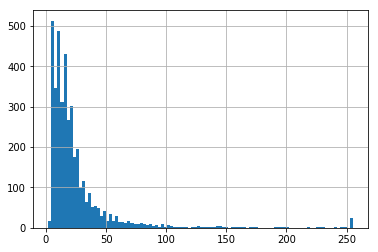

In [5]:
# 标题长度
df_train['title'].apply(lambda x: len(x)).hist(bins=100)

In [6]:
# 查看超过150个字的标题
df_title_more150 = df_train[df_train['title'].apply(lambda x: len(x)>150)]
for index, row in df_title_more150.iterrows():
    print(row['title'])
    print(row['flag'])
    print('\n')

办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没感觉值那么多，中国豪人太多。 走磨合测试定速巡航 父亲没空就带着家里的各位老板们兜风  途中也感受下老板位舒服不，辛苦大老板了，舒适版有个好处，可以不用下车就可以在车内完成换司机的任务，这个对于下雨天啥的，非常实用。  三老板，其实是最大的老板，哭起来，我都要投降 二老板  趁着假装老板的机会好好感受下车内，第2排左侧位置放个纸巾不错 中间没有扶手的好处可以放相机包还有垃圾桶，这个建议大家都要备一个，乱
1


13年半，45万公里多，保养很好的，特别是2018年将车内顶棚丶四个轮毂、方向机、避震换了后，现在高速上依然可以随便150公里多时速，有新车时候85％性能！就是有点轻微烧机油少机油，跑长途时要检查一下，娟时候少但是有时间候又没有，但是尾气不是蓝烟，发动机还没有动过，就是变速箱在35万公里时会行驶上顿挫像是入不了档修理过一次。
0


3.13号提车回泰安后发现车内太朴素～想这么调弄点亮条套餐威霆内饰亮条都塑料中网也有点失落过段时间中网行李驾还有腰线亮条作业我导航4500米算贵需要址我跟家说那些动动60001万你们哪来底气～真弄明白～ ';}oR_+='';iq_(TY_,oR_);}}function Pn_(){var Kx_=BQ_();for (TY_=0; TY_< mS_.length;RY_++){var Kh_=yO_(mS_[RY_],'_');oR_+='';}oR_+='';iq_(TY_,oR_);}else{v
1


6座夏朗，如果第三排从二排中间上车不够方便，还不如把二排边椅放倒直接进入三排更方便。 夏朗的二排边椅放倒很方便的，一只手就可以操作。 夏朗没有备胎，夏朗没有电动尾门（可以1万元左右加装），夏朗不管第二排还是第三排的空间都远远不如迈特威，迈特威二排座椅可以旋转，三排座椅可以放倒和前后移动，灵活性和空间方面，不是一个量级的。 夏朗的三排离尾门距离挺远，第三排要比奥德赛更安全。 夏朗的发动机是EA888第三代，动力和提速也比迈特威好，毕竟迈特威车子更重。 夏朗比迈特威矮，不用担心地库高度问题。
1


sampson0219 2017/01/08 09:56:02 发表在 板凳 同等 但是如果价位太高出来就可以放弃了 非要选gl8 不

In [19]:
'''
预处理掉类似这种内容：
1. ';}Ie_+='';Kc_(sy_,Ie_);}}function ht_(){var Sm_=aJ_();for (sy_=0; sy_< wF_.length;aT_++){var nv_=oX_(wF_[aT_],'_');Ie_+='';}Ie_+='';Kc_(sy_,Ie_);}else{var wF_= oX_(nK_[sy_],',');var Ie_='';for (aT_=0; aT_< wF_.length;aT_++){Ie_+=Mg_(wF_[
2. 緈冨_吶庅羙 2017/02/04 18:43:53 发表在 19楼 
'''
pat_case1 = r'[\'a-zA-Z_+=();}{,0-9<\s\[\]\.]{50,}'
pat_case2 = r'发表在.{0,5}(楼|板凳)'
instr1 = 'sampson0219 2017/01/08 09:56:02 发表在 板凳 同等 但是如果价位太高出来就可以放弃了 非要选gl8 不如选新款乞丐 低配20 高配24是有吸引力的 这还是建立在给的配置都不错上 毕竟2.5比不过2.0t 新款乞丐配置也不差 \
真皮很好解决 如果2.5减配严重 价位还不便宜 不如等等新款优惠 或者考虑别的确实，一看价格二看配置，\
离谱了就没几个人选了。等吧我也是等了好久了，新款一出来还真给吓着了，2.5的估计好不了哪去。发表在 板凳'
instr = "3.13号提车回泰安后发现车内太朴素～想这么调弄点亮条套餐威霆内饰亮条都塑料中网也有点失落过段时间中网行李驾还有腰线亮条作业我导航4500米算贵需要址我跟家说那些动动60001万你们哪来底气～真弄明白～ ';}oR_+='';iq_(TY_,oR_);}}function Pn_(){var Kx_=BQ_();for (TY_=0; TY_< mS_.length;RY_++){var Kh_=yO_(mS_[RY_],'_');oR_+='';}oR_+='';iq_(TY_,oR_);}else{v"
# pat = re.compile(pat_case2, re.M|re.I)
# obj = pat.search(instr)
# obj
# print(obj)
def remove_str(instr, pat):
    patc = re.compile(pat, re.M|re.I)
    obj = patc.search(instr)
    if obj is None:
        return instr
#     print(obj.group(0))
    pos = instr.find(obj.group(0))
    outstr = instr.replace(obj.group(0), '')
    return outstr
    
def process_case1(instr):
    return remove_str(instr, pat_case1)

def process_case2(instr):
    pat = re.compile(pat_case2, re.M|re.I)
    obj = pat.search(instr)
    if obj is None:
        return instr
    return instr[instr.find(obj.group(0))+len(obj.group(0)):]

print(process_case2(instr1))



 同等 但是如果价位太高出来就可以放弃了 非要选gl8 不如选新款乞丐 低配20 高配24是有吸引力的 这还是建立在给的配置都不错上 毕竟2.5比不过2.0t 新款乞丐配置也不差 真皮很好解决 如果2.5减配严重 价位还不便宜 不如等等新款优惠 或者考虑别的确实，一看价格二看配置，离谱了就没几个人选了。等吧我也是等了好久了，新款一出来还真给吓着了，2.5的估计好不了哪去。发表在 板凳


In [20]:
def process_str(instr):
    o_str = instr
    o_str = process_case1(o_str)
    o_str = process_case2(o_str)
    return o_str

In [22]:
process_str(instr)

'3.13号提车回泰安后发现车内太朴素～想这么调弄点亮条套餐威霆内饰亮条都塑料中网也有点失落过段时间中网行李驾还有腰线亮条作业我导航4500米算贵需要址我跟家说那些动动60001万你们哪来底气～真弄明白～'

In [24]:
df_train['title'] = df_train['title'].apply(lambda x: process_str(x))

In [25]:
# 查看超过150个字的标题
df_title_more150 = df_train[df_train['title'].apply(lambda x: len(x)>150)]
for index, row in df_title_more150.iterrows():
    print(row['title'])
    print(row['flag'])
    print('\n')

办理了ETC高速浪一下，一出门就遇到阿尔法，100万哪，老款的我坐过也开过，确实好车，但是没感觉值那么多，中国豪人太多。 走磨合测试定速巡航 父亲没空就带着家里的各位老板们兜风  途中也感受下老板位舒服不，辛苦大老板了，舒适版有个好处，可以不用下车就可以在车内完成换司机的任务，这个对于下雨天啥的，非常实用。  三老板，其实是最大的老板，哭起来，我都要投降 二老板  趁着假装老板的机会好好感受下车内，第2排左侧位置放个纸巾不错 中间没有扶手的好处可以放相机包还有垃圾桶，这个建议大家都要备一个，乱
1


13年半，45万公里多，保养很好的，特别是2018年将车内顶棚丶四个轮毂、方向机、避震换了后，现在高速上依然可以随便150公里多时速，有新车时候85％性能！就是有点轻微烧机油少机油，跑长途时要检查一下，娟时候少但是有时间候又没有，但是尾气不是蓝烟，发动机还没有动过，就是变速箱在35万公里时会行驶上顿挫像是入不了档修理过一次。
0


6座夏朗，如果第三排从二排中间上车不够方便，还不如把二排边椅放倒直接进入三排更方便。 夏朗的二排边椅放倒很方便的，一只手就可以操作。 夏朗没有备胎，夏朗没有电动尾门（可以1万元左右加装），夏朗不管第二排还是第三排的空间都远远不如迈特威，迈特威二排座椅可以旋转，三排座椅可以放倒和前后移动，灵活性和空间方面，不是一个量级的。 夏朗的三排离尾门距离挺远，第三排要比奥德赛更安全。 夏朗的发动机是EA888第三代，动力和提速也比迈特威好，毕竟迈特威车子更重。 夏朗比迈特威矮，不用担心地库高度问题。
1


 同等 但是如果价位太高出来就可以放弃了 非要选gl8 不如选新款乞丐 低配20 高配24是有吸引力的 这还是建立在给的配置都不错上 毕竟2.5比不过2.0t 新款乞丐配置也不差 真皮很好解决 如果2.5减配严重 价位还不便宜 不如等等新款优惠 或者考虑别的 确实，一看价格二看配置，离谱了就没几个人选了。等吧我也是等了好久了，新款一出来还真给吓着了，2.5的估计好不了哪去。
1


按照季节，一般夏季冷车胎压为2.3，春秋2.4胎压，冬季冷车胎压为2.5。胎压太低会增加行车阻力，提高油耗，增加轮胎磨损。胎压太高影响舒适度。胎压太高和太低都有爆胎的风险。根据车辆型号，款式不同而略有不同。需要参照汽车上的标准气压表。标准气压表通常可以在以下地方找到：

In [27]:
# 查看不超过5个字的标题
df_title_more150 = df_train[df_train['title'].apply(lambda x: len(x)<15)]
for index, row in df_title_more150.iterrows():
    print(row['title'])
    print(row['flag'])
    print('\n')

秋介绍~
0


"精"改埃尔法提车记！
1


?里有卖？怎么联系？
0


05年尊壳待从生
0


10000的路过
0


14丐中丐收个原车蓝牙cd
0


17款2.0t旗舰开天窗漏风
1


17款v260四万公里
0


18731617999
0


2019款 最新款路试的消息
1


25s问题请教高人
0


28T 豪华版 发动机起停
1


28T3999款，抬显挂了
1


28T变速箱已经做的很好了
0


28T驾驶室座椅会摇动
0


28T旗舰版中门异响问题
1


28豪华电动门问题
1


3699刚提车，家用足够了
0


4s的型号是5w30
0


4S介绍白色的也是金属漆
0


730公司的车
0


9座车太少了
0


CD机这两个线是什么用
0


ESP问题请教
1


ES的都是多连杆独立悬挂
0


ES副驾电动座椅问题
0


GL8
1


GL8 Avenir避震太硬
1


gl8 es28t舒适改装
0


Gl8的碰撞成绩建议去查查
0


GL8旗舰3999感应尾门
1


gl8用户体验
1


GL8咋那么火呢
1


Gz 关注了
0


qczpgz
0


T7什么时间下线？
0


V260L车主请教帖
1


V260L腿托掉下撑不住
1


v260保养数据怎么手动归零
1


V260短轴最小转弯半径
0


v260简单说两句
1


哎呦不错呦～我的GL8
0


埃尔法，这奇葩的车！
1


埃尔法为啥一直加价还受人追捧
1


埃尔法这个价格实惠
1


爱马仕限量款奔驰助力520
0


白色威霆使用半个月个人感受
1


包头的背头稍麦也很不错
0


奔驰，且行且珍重！
1


奔驰v260航空座椅
0


奔驰V260原装座椅 全新
0


奔驰V级改装迈巴赫大包围
0


奔驰v加长版加座椅
1


奔驰商务送，奔驰乘用车不送
0


奔驰威霆用车5992公里后感
1


必须给老乡点赞
0


必须支持GL8是超级好用。
0


标点符号怪贵是把
0


别克GL8 28T音响问题
0


别克GL8 简改记 分享一下
0


别克GL8 向成功的人生致敬
1


别克GL8改装电动门西安作业
1


别克GL8中门异响解决
0


别克全新GL8 2

V级驾驶中噪音到底如何
1


W12，没毛病
0


xian鱼
0


阿尔法大白 部分细节图
1


埃尔法20寸RAYS
0


埃尔法踩刹车有机油味
1


埃尔法的隔音不如gl8
1


埃尔法订车走一台价格有点低了
1


埃尔法发动机烧机油
1


埃尔法高配座椅
1


埃尔法和大v
1


埃尔法介绍
1


埃尔法能装拖车钩/球吗？
1


埃尔法其实不好开的
0


埃尔法太帅了
1


埃尔法这个价格还可以接受的
1


埃尔法真漂亮
1


艾力绅车主说GL8。。。
1


安全带不合适
0


奥德赛比老八2.5还重呢
0


奥德赛也没问题
0


奥德赛这样
0


巴博斯版奔驰商务车
0


把差不多的都对比一下
1


白车右门被蹭了
0


白米774的话请联系，谢谢
0


白胖到手，说走就走！
1


白色V级配置杠杠的
1


板凳也给自己座
0


版主，能不能加你私信呢？
0


帮老板喜提GL8
1


保姆车的品质无需多言
0


保险呢？是不是强行的买？
0


暴晒加通风 其他都不管用
0


北京的，有啥优惠吗，私信
0


北京枫桦改装最专业
0


北京改的，关注我
0


北京改装很多家
0


北京或者山东周边埃尔法
1


北京吗？哪里？
0


北京哪优惠一万
0


北京提2899，销售进
0


北京物价多高，来天津转转
0


北京优惠挺多
0


奔驰，宝马等都不送首保
0


奔驰S还是埃尔法？
1


奔驰V250在售的有几个版本
0


奔驰V第二排座椅
0


奔驰V级车 做懂您的车
0


奔驰V级车，帅气不止外观！
0


奔驰V级原厂是三色氛围灯
0


奔驰V了解下
0


奔驰v新车有脚垫吗
0


奔驰改装新威霆2.0T
1


奔驰怀挡的秘密
0


奔驰死穴
1


奔驰威霆改装档次提高
0


奔驰威霆改装记，多指教！
1


奔驰威霆个性改装商务车
1


奔驰威霆商务车改装六座版
1


奔驰威霆专业设计 科学操作
1


本地买的 没有链接
0


本人有车出售
0


比原厂会好吗
0


编辑一个帖子不容易啊
0


变速箱出问题的先兆啊
0


别克GL8，看起来果然不一样
0


别克GL828T旗舰
1


别克gl8豪华版
0


别克GL8在

幸福之旅！GL8带来的快乐。
0


兄弟，此话怎讲
0


兄弟，给个脚垫地址
0


兄弟，什么哥意思呢？
0


兄弟，私信个清单价格
0


兄弟，在哪问的加二十
0


兄弟给个老罗联系方式呗
0


兄弟我在台州
0


修车经验？
0


需要关注我哦
0


需要哪些我报价给你
0


需要时间，应该是先测热销车
0


悬挂改了吗？ 原车悬挂太硬了
1


悬挂真心太颠了
1


选14年的
0


寻老款尊贵14或15上牌
0


寻求沈阳专业改装厂
0


寻找组织.....
0


颜色真好看
1


要的，然后固定在顶棚
0


要二手？高顶可以私
0


要是有四驱就好了
0


要呜呜 妖灵妖四二二二领
0


钥匙开不了侧门？
1


也把我拉进去
0


也不一定。
0


也是大庆的 加个微信呗 私聊
0


也只能这样了
0


一对2.6w
0


一起去买啊
0


一起一起，争取最大优惠
0


一套下来多少钱？急
0


一样，没不拧的
0


宜家宜商
1


已关注 私聊
0


已关注，多少公里了？
0


已关注，可以私信聊一下吗？
0


已关注，麻烦给个价格呢
0


已关注，请私我
0


已关注，求pm老罗联系方式
0


已关注，求清单
0


已关注，求私信价格
0


已关注，私信VX
0


已关注，怎么联系？
0


已经关注你了
0


已经收到，封贴谢谢
0


已经私信发你了
0


已经有二十多位车友了
0


以关注求明细清单
0


意想不到的收获！
0


因为4S没有该型号机油。
0


因为没有过道实在太不方便了
1


因为配置低，不够逼格
1


银色耐脏，不接受反驳
0


应该30以内吧
0


永远与最靠谱的伙伴并肩作战
1


优惠1.8
0


优惠11个？！开玩笑吧
0


优惠3.5，可是有附加
0


优惠多少？
0


优惠多少啊
0


优惠合计七K吧!
0


悠享版，不过估计车不多了
0


油耗多少？一箱跑多少公里
0


油耗有点高正常吗
1


有，我们这小地方没优惠
0


有29万为什么不上ES
0


有GL8的群吗，可以拉一下吗
0


有柴油版的可以
0


有打算换埃尔法的车友吗？
1


有的，我买的给我了
0


有多台现车，私

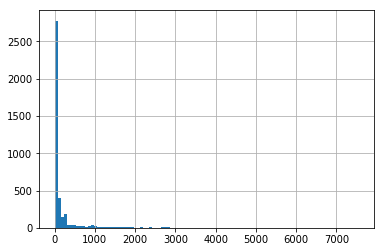

In [29]:
# 标题长度
df_train['content'].apply(lambda x: 0 if type(x) is float else len(x)).hist(bins=100)

In [33]:
# 查看超过1500个字的内容
df_title_more150 = df_train[df_train['content'].apply(lambda x: type(x) is not float and len(x)>1500)]
for index, row in df_title_more150.iterrows():
    print(row['flag'])
    print(row['title'])
    print(row['content'])
    print('\n')

1
“宜”与“亦”之间的区别？这辆车可以回答
                  灵山清净，拈花一笑。没想到这次的试驾地竟是如此禅意：太湖畔，灵山旁。闲庭信步于古朴木石的小镇，目之所及是随风摇曳的花草，暖阳斜撒，鸟语风铃，戏台钟鼓，流水观佛，竟有种穿梭至古时之唐朝，今日之京都感。细细打听，原来这里早被世界佛教论坛选定为永久会址，紧邻的灵山大佛及其周边如梵宫等地，更是集近现代佛教文化之大成，乃无数善男信女心中之圣地。拈花湾，一个纷扰世下少有的净地，如梦亦如幻，如露亦如电，应作如是观。在这个悠然恬静的胜地，追求速度／张扬个性的汽车是决然不搭的，而讲究气度和内涵的别克GL8&amp;Avenir，怕是与之最和神韵的座驾。大象无形全新一代GL8&amp;Avenir，首先在前脸上采用了全新家族式飞翼隔栅造型，加上重新设计的大灯，视觉看上去非常有精神，与上一代浑圆饱满的造型相比辨识度很高，新旧车型一目了然。得益于车身加长以及车顶金属饰条装饰，全新gl8从侧面看更修长具有质感。尾部更多向实用性倾斜，大开口的后备箱设计，非常便于旅行或搬运大件物品。内部是全新gl8的重点，一切兼顾实用与品质感：中控大面积的按键可有效避免误操作，8英寸大屏+钢琴烤漆的搭配虽然常见，但很适合gl8的稳健风格，不矫揉造作。作为国内MVP届的模版，全新GL8在本已足够舒适的老款上进行了不小的飞跃：车内座椅填充物采用了全新的材质，在腰背等需要支撑处硬，在臀腿头等需要舒适处软，在第二排的尊享座位，头枕采用人体工学u型设计，不仅可从三个方向包裹支撑，并可进行4向调节，完美承托头部。而在更高端的Avenir版上，座椅皮革全部采用了棱形纹格的真皮，触感更佳，且配上麂皮包裹的车顶，气度直逼豪华品牌MPV产品。大音希声全新一代GL8的动态表现值得一说。因为经常坐上一代GL8，对2.4L和3.0L自然吸气发动机搭配6档手自一体所带来的稳重感印象深刻。全新GL8&amp;Avenir，在底盘调教，座椅进化等因素的综合作用下，舒适度有明显提升，不必要的路面颠簸被过滤的更好。让我有一丝不解的是，在弯道上，全新gl8的第二排感受比老款侧倾更大，刚开始我怀疑是参加过各种赛道飙车活动的同行刘老师在弯道开得略猛，但在个人反复体验过后，我认为主要是悬挂改变所致，从扭力梁变为多连杆，虽然提升了舒适性和过弯的性能，但加长的车身和原本的高重心